In [1]:
import numpy as np
import pandas as pd
from fastai.text.all import *
import torch

In [5]:
# Read the language model data
fastai_language_model_data = torch.load("..\lm_data.pkl")

In [6]:
# Set the batch size to 16 (default is 64 but my machine does not have a lot of VRAM, sad life)
fastai_language_model_data.bs = 16

In [7]:
fastai_language_model_data.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj may xxmaj god xxup shield all truck drivers xxunk goods school staff providing breakfast lunch to kids grocery store employees stocking shelves and all first responders including my team and i during this time and the next few weeks xxbos xxmaj grocery store workers , truckers , warehouse workers , farmers , teachers , physicians , nurses , refuse collectors , delivery drivers , gas station attendants , pharmacy workers","xxmaj may xxmaj god xxup shield all truck drivers xxunk goods school staff providing breakfast lunch to kids grocery store employees stocking shelves and all first responders including my team and i during this time and the next few weeks xxbos xxmaj grocery store workers , truckers , warehouse workers , farmers , teachers , physicians , nurses , refuse collectors , delivery drivers , gas station attendants , pharmacy workers ,"
1,xxmaj mask xxmaj scam xxunk xxmaj lab xxmaj scam 1 xxrep 3 0 xxmaj cr xxup covid xxmaj test xxmaj kit xxmaj scam 2 xxrep 3 0 xxmaj cr xxup xxunk xxmaj hand xxmaj sanitizer xxmaj scam 5 xxrep 3 0 xxmaj cr xxmaj corona xxmaj relief xxmaj scam 2 xxrep 4 0 xxmaj cr xxmaj xxunk xxmaj gandhi xxmaj virus xxmaj research xxmaj centre 3 xxrep 4 0 xxmaj cr xxbos,mask xxmaj scam xxunk xxmaj lab xxmaj scam 1 xxrep 3 0 xxmaj cr xxup covid xxmaj test xxmaj kit xxmaj scam 2 xxrep 3 0 xxmaj cr xxup xxunk xxmaj hand xxmaj sanitizer xxmaj scam 5 xxrep 3 0 xxmaj cr xxmaj corona xxmaj relief xxmaj scam 2 xxrep 4 0 xxmaj cr xxmaj xxunk xxmaj gandhi xxmaj virus xxmaj research xxmaj centre 3 xxrep 4 0 xxmaj cr xxbos xxmaj
2,"xxmaj fry 's xxmaj food xxmaj and xxmaj drug https : / / t.co / xxunk xxbos xxmaj as part of the consumer # coronavirus response , we also saw early hoarding of important xxunk and medical supplies like hand sanitizer , sterilizing wipes , and ( most importantly ) surgical masks . xxmaj we should note that these hoarding behaviors were global . xxbos a plunge in prices has # oilandgas","fry 's xxmaj food xxmaj and xxmaj drug https : / / t.co / xxunk xxbos xxmaj as part of the consumer # coronavirus response , we also saw early hoarding of important xxunk and medical supplies like hand sanitizer , sterilizing wipes , and ( most importantly ) surgical masks . xxmaj we should note that these hoarding behaviors were global . xxbos a plunge in prices has # oilandgas xxunk"


In [23]:
# Premare the model
lm_learner = language_model_learner(fastai_language_model_data,
                                    AWD_LSTM,
                                    metrics=accuracy,
                                    drop_mult=0.2
                                   )

SuggestedLRs(valley=0.005248074419796467)

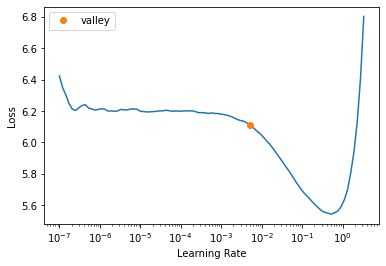

In [24]:
# Finding the best learning rate
lm_learner.lr_find()

In [25]:
# Training just the last few layers for 5 epoch
lm_learner.fit_one_cycle(5, 0.005)

epoch,train_loss,valid_loss,accuracy,time
0,4.182218,4.014528,0.319493,03:11
1,3.805860,3.787229,0.336370,03:18
2,3.623776,3.723620,0.342193,03:19
3,3.494596,3.703640,0.344256,03:15
4,3.428021,3.702196,0.344270,03:14


SuggestedLRs(valley=0.0002290867705596611)

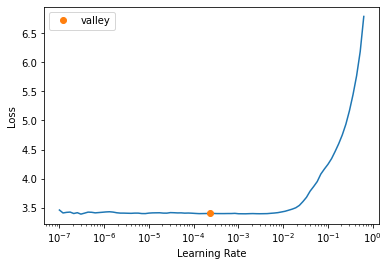

In [26]:
# Unfreezing allthe weight parameters
lm_learner.unfreeze()
lm_learner.lr_find()

In [27]:
# Training the whole model for 5 epochs
m_learner.fit_one_cycle(5, slice(0.00001, 0.01))

epoch,train_loss,valid_loss,accuracy,time
0,3.455807,3.694270,0.343904,03:55
1,3.409417,3.627638,0.353409,03:57
2,3.153597,3.618243,0.358660,03:57
3,2.907474,3.643191,0.361426,03:58
4,2.741314,3.674730,0.360460,03:57


In [28]:
lm_learner.show_results()

,input,target,pred
0,"xxbos xxmaj between 60 to 70 of the u s economy is driven by consumer spending xxbos xxmaj take a look on the # trading potential of # euets - covered industries affected by # coronavirus . xxmaj do they collapse , do they shift operations ? xxmaj read why the price should bounce soon : https : / / t.co / xxunk \r\r\n▁ # xxup euets # xxunk # xxup co2","xxmaj between 60 to 70 of the u s economy is driven by consumer spending xxbos xxmaj take a look on the # trading potential of # euets - covered industries affected by # coronavirus . xxmaj do they collapse , do they shift operations ? xxmaj read why the price should bounce soon : https : / / t.co / xxunk \r\r\n▁ # xxup euets # xxunk # xxup co2 #","xxmaj the xxmaj + 70 % the xxup s population is spending by consumer spending and xxmaj the a look at the # coronavirus potential of # xxup xxunk xxunk xxunk , by # coronavirus . xxmaj read n't see in they they know operations , xxmaj read more ? # of be back . https : / / t.co / xxunk xxbos # xxunk euets # xxunk # xxunk euets #"
1,e xxmaj learning in the schools xxmaj xxunk to encourage social distancing xxmaj enough xxmaj food stock xxbos xxmaj don t forget to wash your xxmaj hans xxbos xxmaj fruits being sold a high prices | xxmaj seller caught # xxmaj coronavirus # xxup covid-19 # … https : / / t.co / xxunk via @youtube xxbos xxmaj leaders : xxmaj we do n't want to spread # coronavirus so you can,xxmaj learning in the schools xxmaj xxunk to encourage social distancing xxmaj enough xxmaj food stock xxbos xxmaj don t forget to wash your xxmaj hans xxbos xxmaj fruits being sold a high prices | xxmaj seller caught # xxmaj coronavirus # xxup covid-19 # … https : / / t.co / xxunk via @youtube xxbos xxmaj leaders : xxmaj we do n't want to spread # coronavirus so you can only,- xxunk xxmaj xxmaj xxmaj and xxunk and go people distancing and in to to xxmaj is xxmaj the t panic to stock your hands don sanitizer xxmaj the and sold at little price in xxmaj xxunk xxmaj in xxmaj xxunk \r\r\n xxmaj covid19 # xxmaj \r\r\n : / / t.co / xxunk xxbos xxunk xxbos xxmaj the of xxmaj do are n't need to hear the coronavirus but we can get
2,"xxunk # 2020 # drawing # comedy # satire # breakingnews # panicbuyinguk https : / / t.co / xxunk xxbos xxmaj who is the person who described senior citizens as "" 80 year old teenagers "" because xxmaj i 'm pretty sure xxmaj i 'm going to catch my 90 - year - old xxunk xxunk out the house at 7 a.m. to go to the grocery store … \r\r\n\r\r\n▁ #","# 2020 # drawing # comedy # satire # breakingnews # panicbuyinguk https : / / t.co / xxunk xxbos xxmaj who is the person who described senior citizens as "" 80 year old teenagers "" because xxmaj i 'm pretty sure xxmaj i 'm going to catch my 90 - year - old xxunk xxunk out the house at 7 a.m. to go to the grocery store … \r\r\n\r\r\n▁ # quarantine","xxunk xxunk # xxunk # xxunk # xxunk # comic # news # : / / t.co / xxunk xxbos xxmaj the knew the first who is the panic to being xxunk % old "" with with of iâm 'm a sure they i 'm not to be them # year year old old daughter who xxmaj of # with the am and 6 to the grocery store . # # coronavirus"
3,"19 is pushing us to the fourth industrial revolution by force xxmaj flexible working xxmaj online shopping xxmaj online festival s xxmaj less human contact xxmaj automation xxbos xxmaj if i think i will be contacted about # shielding do i go to work tomorrow ? i work in a supermarket , close proximity to many people for 9 hours # xxunk # xxup covid?19 # coronavirus xxbos xxmaj love to the","is pushing us to the fourth industrial revolution by force xxmaj flexible working xxmaj online shopping xxmaj online festival s xxmaj less human contact xxmaj automation xxbos xxmaj if i think i will be contacted about # shielding do i go to work tomorrow ? i work in a supermarket , close proximity to many people for 9 hours # xxunk # xxup covid?19 # coronavirus xxbos xxmaj love to the freelancers","xxbos a the to close brink le

In [29]:
lm_learner.export(r"E:\Work\Data_Science\Projects\Text_Classification_FastAI_V2\model\language_model")

In [ ]:
lm_learner.save_encoder(r"")